In [3]:
using Distributions
using StatsBase
using CSV
using DataFrames
using HypothesisTests
using Plots
using GLM


┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1242
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1242
┌ Info: Precompiling HypothesisTests [09f84164-cd44-5f33-b23f-e6b0d136a0d5]
└ @ Base loading.jl:1242
┌ Info: Recompiling stale cache file /Users/eddie/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1242


In [4]:
pyplot()

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1242
┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/eddie/.julia/packages/PyCall/zqDXB/src/PyCall.jl:697
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/eddie/.julia/packages/Conda/3rPhK/src/Conda.jl:113


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/eddie/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |           py37_0          14 KB
    freetype-2.9.1             |       hb4e5f40_0         555 KB
    kiwisolver-1.2.0           |   py37h04f5b5a_0          55 KB
    libpng-1.6.37              |       ha441bb4_0         262 KB
    matplotlib-3.1.3           |           py37_0          21 KB
    matplotlib-base-3.1.3      |   py37h9aa3819_0         4.9 MB
    pyparsing-2.4.7            |             py_0          65 KB
    python-dateutil-2.8.1      |             py_0         215 KB
    tornado-6.0.4              |   py37h1de35cc_1         597 KB
    ------------------------------------------------------------
                                           Total

Plots.PyPlotBackend()

In [5]:
age = rand(18:80,100)
wcc = round.(rand(Distributions.Normal(12,2),100), digits=1)
crp = round.(Int, rand(Distributions.Chisq(4),100)) .* 10
treatment = rand(["A","B"],100)
result = rand(["Improved", "Static", "Worse"],100);


In [6]:
mean(age)

49.91

In [7]:
median(age)

50.0

In [12]:
std(age)

16.537740737079798

In [13]:
mean(wcc)

12.105

In [14]:
std(wcc)

2.0415568925343583

In [10]:
StatsBase.describe(age)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           49.910000
Minimum:        18.000000
1st Quartile:   36.750000
Median:         50.000000
3rd Quartile:   62.250000
Maximum:        80.000000
Type:           Int64


In [15]:
StatsBase.describe(wcc)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           12.105000
Minimum:        4.900000
1st Quartile:   11.075000
Median:         12.350000
3rd Quartile:   13.525000
Maximum:        16.100000
Type:           Float64


In [16]:
StatsBase.summarystats(wcc)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           12.105000
Minimum:        4.900000
1st Quartile:   11.075000
Median:         12.350000
3rd Quartile:   13.525000
Maximum:        16.100000


In [23]:
data = DataFrame(Age = age, WCC = wcc, CRP= crp, Treatment = treatment, Result = result);

In [24]:
size(data)

(100, 5)

In [25]:
first(data,6)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,39,9.3,10,A,Worse
2,51,14.6,50,A,Worse
3,75,7.1,50,A,Improved
4,59,12.0,10,A,Improved
5,62,13.6,60,A,Static
6,59,11.9,30,B,Static


In [40]:
dataA = data[data[:Treatment] .== "A",:]
dataB = data[data[:Treatment] .== "B",:];

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[40]:1
└ @ Core In[40]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[40]:2
└ @ Core In[40]:2


In [29]:
first(dataA,6)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,39,9.3,10,A,Worse
2,51,14.6,50,A,Worse
3,75,7.1,50,A,Improved
4,59,12.0,10,A,Improved
5,62,13.6,60,A,Static
6,63,11.8,70,A,Worse


In [30]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Age,49.91,18,50.0,80,,,Int64
2,WCC,12.105,4.9,12.35,16.1,,,Float64
3,CRP,47.3,10,40.0,210,,,Int64
4,Treatment,,A,,B,2,,String
5,Result,,Improved,,Worse,3,,String


In [34]:
combine(df -> DataFrame(N = size(df,1)), groupby(data, :Treatment))

,Treatment,N
,String,Int64
1,A,60
2,B,40


In [35]:
combine(df -> mean(df.Age), groupby(data, :Treatment))

,Treatment,x1
,String,Float64
1,A,51.3333
2,B,47.775


In [36]:
combine(size, groupby(data, :Treatment))

,Treatment,x1
,String,Tuple…
1,A,"(60, 5)"
2,B,"(40, 5)"


In [37]:
groupby(data, :Treatment)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,39,9.3,10,A,Worse
2,51,14.6,50,A,Worse
3,75,7.1,50,A,Improved
4,59,12.0,10,A,Improved
5,62,13.6,60,A,Static
6,63,11.8,70,A,Worse
7,41,13.2,70,A,Worse
8,36,13.7,50,A,Improved
9,62,9.5,40,A,Static


In [38]:
combine(df -> std(df.Age), groupby(data, :Treatment))

,Treatment,x1
,String,Float64
1,A,15.3961
2,B,18.1072


In [41]:
combine(df -> describe(df.Age), groupby(data, :Treatment))

Summary Stats:
Length:         60
Missing Count:  0
Mean:           51.333333
Minimum:        20.000000
1st Quartile:   39.000000
Median:         51.000000
3rd Quartile:   63.000000
Maximum:        80.000000
Type:           Int64
Summary Stats:
Length:         40
Missing Count:  0
Mean:           47.775000
Minimum:        18.000000
1st Quartile:   32.500000
Median:         48.000000
3rd Quartile:   59.250000
Maximum:        80.000000
Type:           Int64


,Treatment,x1
,String,Nothing
1,A,
2,B,


In [42]:
using StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1242


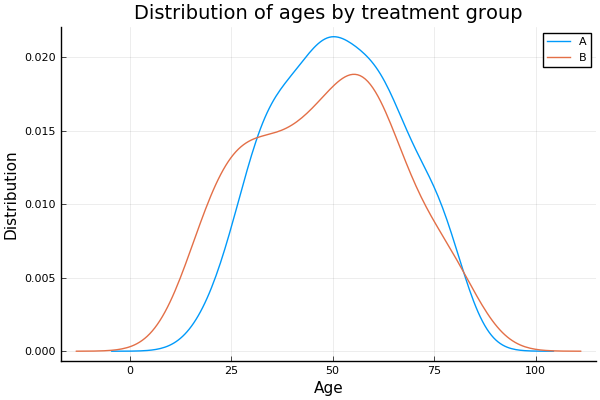

In [43]:
@df data density(:Age, group = :Treatment, title = "Distribution of ages by treatment group",
    xlab = "Age", ylab = "Distribution",
    legend = :topright
)

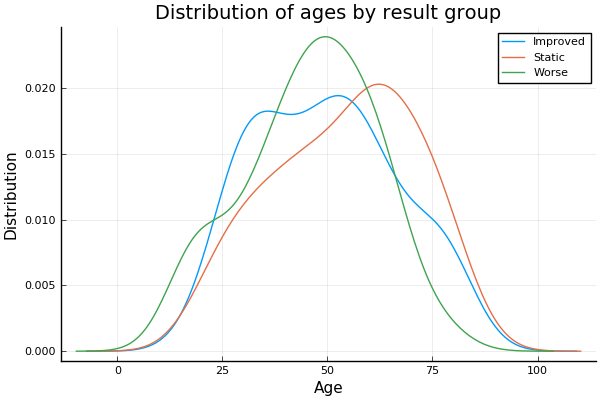

In [44]:
@df data density(:Age, group = :Result, title = "Distribution of ages by result group",
    xlab = "Age", ylab = "Distribution",
    legend = :topright
)

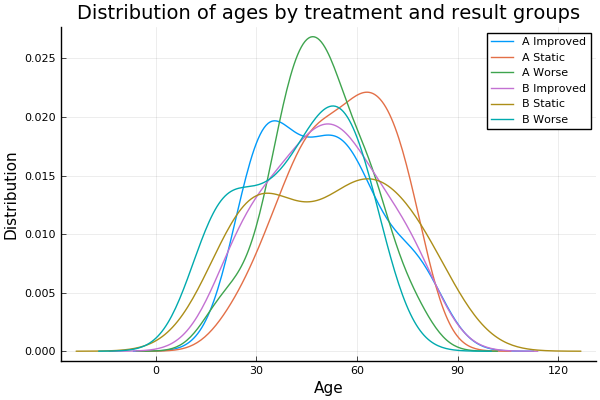

In [47]:
@df data density(:Age, group = (:Treatment,:Result), title = "Distribution of ages by treatment and result groups",
    xlab = "Age", ylab = "Distribution",
    legend = :topright
)

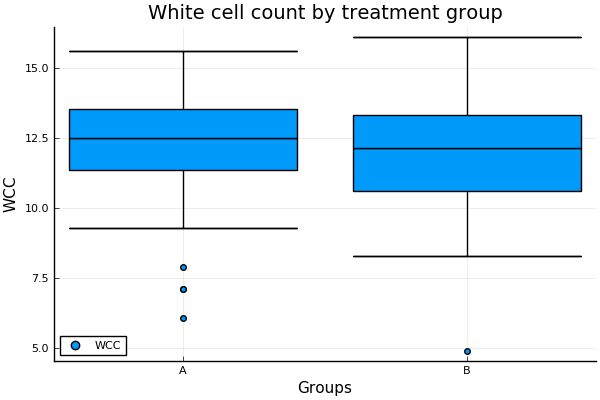

In [49]:
@df data boxplot(:Treatment,:WCC, lab = "WCC", title = "White cell count by treatment group",
    xlab = "Groups", ylab = "WCC"
)

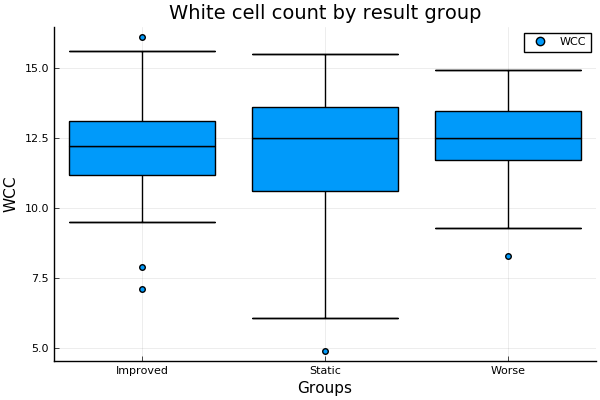

In [50]:
@df data boxplot(:Result,:WCC, lab = "WCC", title = "White cell count by result group",
    xlab = "Groups", ylab = "WCC"
)

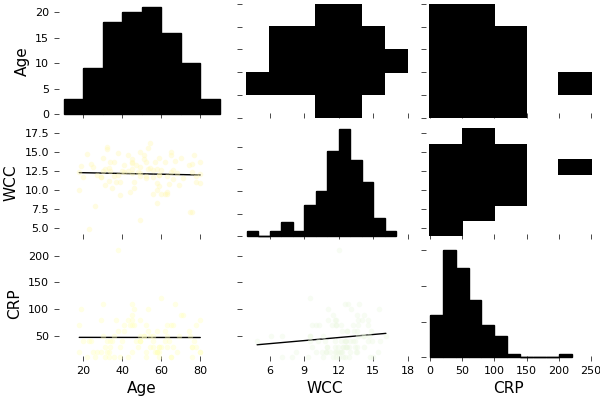

In [51]:
@df data corrplot([:Age :WCC :CRP], grid = false)

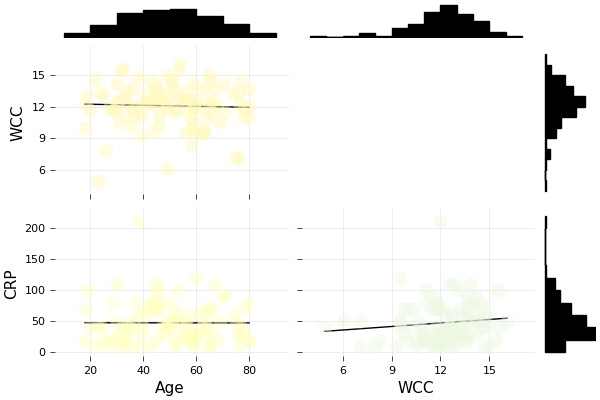

In [53]:
@df data cornerplot([:Age :WCC :CRP], grid = false, compact = true)

In [54]:
HypothesisTests.EqualVarianceTTest(dataA[:Age],dataB[:Age])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[54]:1
└ @ Core In[54]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[54]:1
└ @ Core In[54]:1


Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          3.558333333333337
    95% confidence interval: (-3.1369, 10.2536)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2942

Details:
    number of observations:   [60,40]
    t-statistic:              1.05468405102565
    degrees of freedom:       98
    empirical standard error: 3.373838193412482


In [55]:
pvalue(EqualVarianceTTest(dataA[:WCC],dataB[:WCC]))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[55]:1
└ @ Core In[55]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[55]:1
└ @ Core In[55]:1


0.5646191047328868

In [56]:
UnequalVarianceTTest(dataA[:CRP],dataB[:CRP])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:1
└ @ Core In[56]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:1
└ @ Core In[56]:1


Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -3.6666666666666643
    95% confidence interval: (-17.7595, 10.4261)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.6052

Details:
    number of observations:   [60,40]
    t-statistic:              -0.5195095536758766
    degrees of freedom:       65.70999926955622
    empirical standard error: 7.057938859300185


In [57]:
fit(LinearModel, @formula(CRP ~ 1), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1

Coefficients:
──────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error  t value  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)      47.3     3.23446  14.6238    <1e-25    40.8821    53.7179
──────────────────────────────────────────────────────────────────────────

In [58]:
fit(LinearModel, @formula(CRP ~ Age), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                Estimate  Std. Error     t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  47.5107       10.3826     4.576        <1e-4   26.9068    68.1146  
Age          -0.00422142    0.197566  -0.0213672    0.9830  -0.396284   0.387841
────────────────────────────────────────────────────────────────────────────────

In [59]:
fit(LinearModel, @formula(CRP ~ Age + WCC), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age + WCC

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                Estimate  Std. Error    t value  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  24.0772       22.2914    1.08011      0.2828  -20.165      68.3193 
Age           0.00504769    0.197308  0.0255827    0.9796   -0.386555    0.39665
WCC           1.89764       1.59831   1.18728      0.2380   -1.27456     5.06984
────────────────────────────────────────────────────────────────────────────────

In [60]:
DataFrame(N = size(data,1))

,N
,Int64
1,100


In [61]:
size(data,1)

100

In [63]:
combine(df -> DataFrame(N = size(df,1)), groupby(dataA, :Result))

,Result,N
,String,Int64
1,Worse,17
2,Improved,21
3,Static,22


In [64]:
combine(df -> DataFrame(N = size(df,1)), groupby(dataB, :Result))

,Result,N
,String,Int64
1,Static,11
2,Worse,14
3,Improved,15


In [67]:
observed = reshape([17,14,21,15,22,11],(2,3)) #reshape([17,21,22,14,15,11],(2,3))
observed

2×3 Array{Int64,2}:
 17  21  22
 14  15  11

In [68]:
ChisqTest(observed)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.18600000000000003, 0.124, 0.21600000000000003, 0.14400000000000002, 0.198, 0.132]
    point estimate:          [0.17, 0.14, 0.21, 0.15, 0.22, 0.11]
    95% confidence interval: Tuple{Float64,Float64}[(0.08, 0.2688), (0.05, 0.2388), (0.12, 0.3088), (0.06, 0.2488), (0.13, 0.3188), (0.02, 0.2088)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.6075

Details:
    Sample size:        100
    statistic:          0.9968637992831542
    degrees of freedom: 2
    residuals:          [-0.3709911166081349, 0.45436946739765177, -0.12909944487358085, 0.1581138830084189, 0.494413232473044, -0.6055300708194982]
    std. residuals:     [-0.7061695217765019, 0.7061695217765013, -0.255155181539915, 0.25515518153991423, 0.9550424786294757, -0.9550424786294757]


In [69]:
CSV.write("ProjectData_1_point_0.csv", data);